In [1]:
import json
import pandas as pd
import seaborn as sns


In [2]:
MONTHS = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]

CURRENTLY_MONTH = "jun"

In [3]:
# read from json
with open("app/stocks.json") as f:
    data = json.load(f)

data

{'BBSE3': {'quantity': {'jan': 178,
   'feb': 178,
   'mar': 178,
   'abr': 178,
   'may': 178}},
 'CVCB3': {'quantity': {'jan': 203,
   'feb': 203,
   'mar': 203,
   'abr': 203,
   'may': 203}},
 'EGIE3': {'quantity': {'jan': 165,
   'feb': 165,
   'mar': 165,
   'abr': 165,
   'may': 165}},
 'ENBR3': {'quantity': {'jan': 379,
   'feb': 379,
   'mar': 379,
   'abr': 379,
   'may': 379}},
 'ITSA4': {'quantity': {'jan': 1390,
   'feb': 1390,
   'mar': 1390,
   'abr': 1390,
   'may': 1390}},
 'PETR4': {'quantity': {'jan': 218,
   'feb': 218,
   'mar': 218,
   'abr': 218,
   'may': 218}},
 'TAEE11': {'quantity': {'jan': 162,
   'feb': 162,
   'mar': 162,
   'abr': 162,
   'may': 162}},
 'UNIP6': {'quantity': {'jan': 194,
   'feb': 194,
   'mar': 194,
   'abr': 194,
   'may': 194}},
 'VIVT3': {'quantity': {'jan': 121,
   'feb': 121,
   'mar': 121,
   'abr': 121,
   'may': 121}},
 'WIZC3': {'quantity': {'jan': 389,
   'feb': 389,
   'mar': 389,
   'abr': 389,
   'may': 389}},
 'BRAP4': {'qu

## Table with stocks name and quantities on a specific month


In [4]:
# convert to dataframe
stocks = []
qtt_by_month = []
for item in data.items():
    stocks.append(item[0])
    quantities_by_month = item[1].get("quantity")
    qtt_by_month.append(quantities_by_month)

df_qtd = pd.DataFrame(qtt_by_month, index=stocks)
df_qtd

,jan,feb,mar,abr,may
BBSE3,178,178,178,178,178
CVCB3,203,203,203,203,203
EGIE3,165,165,165,165,165
ENBR3,379,379,379,379,379
ITSA4,1390,1390,1390,1390,1390
PETR4,218,218,218,218,218
TAEE11,162,162,162,162,162
UNIP6,194,194,194,194,194
VIVT3,121,121,121,121,121
WIZC3,389,389,389,389,389


## Table with the price of closing of the stocks by month


In [5]:
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf

yf.pdr_override()

data_inicial = "2022-12-20"
df_prices = pd.DataFrame(index=stocks)

for month in MONTHS:
    if month == CURRENTLY_MONTH:
        break
    data_final = f"2023-{MONTHS.index(month)+2}-01"

    stocks = df_qtd.index.to_list()
    closing_price = []

    for stock in stocks:
        prices = web.DataReader(f"{stock}.SA", start=data_inicial, end=data_final)
        if prices.shape[0] == 0:
            closing_price.append(0)
        else:
            closing_price.append(prices["Adj Close"].to_list()[-1])

    df_prices[month] = closing_price

df_prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,jan,feb,mar,apr,may
BBSE3,35.839264,34.209999,32.509998,34.310001,30.930000
CVCB3,4.500000,3.030000,3.110000,2.720000,3.380000
EGIE3,37.734474,37.667347,38.520809,39.537292,42.029999
ENBR3,20.124388,19.393309,22.070633,22.500000,23.000000
ITSA4,8.398535,8.103158,8.197971,8.656738,8.756470
PETR4,21.776766,21.083452,19.588232,22.243404,24.514671
TAEE11,37.002316,35.485500,34.757030,36.333717,36.919998
UNIP6,84.312653,78.335487,69.206726,65.250000,68.389999
VIVT3,40.858807,38.045002,37.833397,40.921818,39.807217
WIZC3,6.528180,6.186052,5.437068,5.464808,5.830000


## Totals by month


In [6]:
df_totals = df_qtd * df_prices
df_totals.sum(axis=0)


abr        0.000000
apr        0.000000
feb    92947.853394
jan    99068.319432
mar    90400.187660
may    97407.227000
dtype: float64

In [7]:
df_totals.sum(axis=0).reset_index()


,index,0
0,abr,0.000000
1,apr,0.000000
2,feb,92947.853394
3,jan,99068.319432
4,mar,90400.187660
5,may,97407.227000


In [12]:
df_total_reseted = df_totals.reset_index()
df_total_reseted.columns = ["stock", "jan", "feb", "mar", "apr", "may", "jun"]
df_total_reseted.to_csv("app/stocks_patrimonio.csv", index=False)

df_qtt_reseted = df_qtd.reset_index()
df_qtt_reseted.columns = ["stock", "jan", "feb", "mar", "apr", "may"]
df_qtt_reseted.to_csv("app/stocks_qtt.csv", index=False)

Text(0, 0.5, 'Total R$')

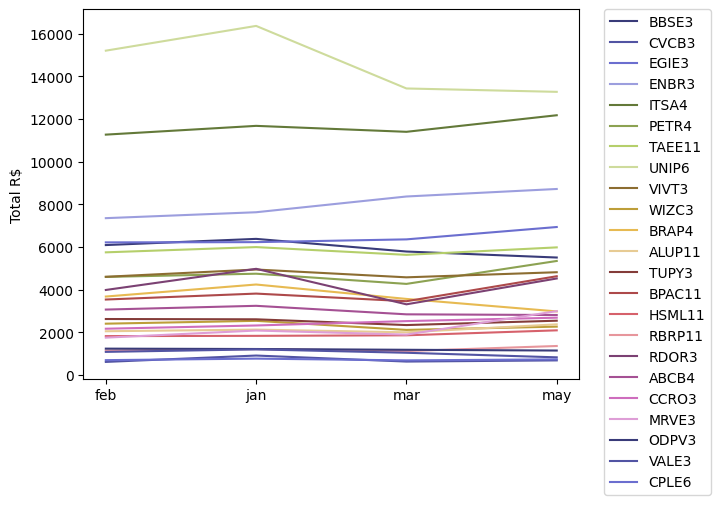

In [14]:
import matplotlib.pyplot as plt


df_lines = df_totals.reset_index().melt(id_vars="index")
_ = sns.lineplot(data=df_lines, x="variable", y="value", hue="index", palette="tab20b")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.xlabel("")
plt.ylabel("Total R$")

In [15]:
df_totals


,abr,apr,feb,jan,mar,may
BBSE3,NaN,NaN,6089.379837,6379.388977,5786.779701,5505.540054
CVCB3,NaN,NaN,615.089994,913.500000,631.329979,686.140023
EGIE3,NaN,NaN,6215.112247,6226.188240,6355.933514,6934.949799
ENBR3,NaN,NaN,7350.063974,7627.142954,8364.769882,8717.000000
ITSA4,NaN,NaN,11263.389616,11673.963337,11395.180168,12171.492920
PETR4,NaN,NaN,4596.192585,4747.334949,4270.234585,5344.198349
TAEE11,NaN,NaN,5748.651054,5994.375114,5630.638939,5981.039703
UNIP6,NaN,NaN,15197.084549,16356.654602,13426.104858,13267.659882
VIVT3,NaN,NaN,4603.445240,4943.915600,4577.841026,4816.673214
WIZC3,NaN,NaN,2406.374168,2539.462068,2115.019446,2267.869970


In [16]:
sectors = {
    "BBSE3": "Financeiro / Previdência e Seguros / Seguradoras",
    "CVCB3": "Consumo Cíclico / Viagens e Lazer / Viagens e Turismo",
    "EGIE3": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "ENBR3": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "ITSA4": "Financeiro / Intermediários Financeiros / Bancos",
    "PETR4": "Petróleo. Gás e Biocombustíveis / Petróleo. Gás e Biocombustíveis / Exploração. Refino e Distribuição",
    "TAEE11": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "UNIP6": "Materiais Básicos / Químicos / Químicos Diversos",
    "VIVT3": "Comunicações / Telecomunicações / Telecomunicações",
    "WIZC3": "Financeiro / Previdência e Seguros / Corretoras de Seguros e Resseguros",
    "BRAP4": "Materiais Básicos / Mineração / Minerais Metálicos",
    "ALUP11": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "TUPY3": "Bens Industriais / Material de Transporte / Material Rodoviário",
    "BPAC11": "Financeiro / Intermediários Financeiros / Bancos",
    "HSML11": "Fundo Imobiliário",
    "RBRP11": "Fundo Imobiliário",
    "RDOR3": "Saúde / Serv.Méd.Hospit..Análises e Diagnósticos / Serv.Méd.Hospit..Análises e Diagnósticos",
    "ABCB4": "Financeiro / Intermediários Financeiros / Bancos",
    "CCRO3": "Bens Industriais / Transporte / Exploração de Rodovias",
    "MRVE3": "Consumo Cíclico / Construção Civil / Incorporações",
    "ODPV3": "Saúde / Serv.Méd.Hospit..Análises e Diagnósticos / Serv.Méd.Hospit..Análises e Diagnósticos",
    "VALE3": "Materiais Básicos / Mineração / Minerais Metálicos",
    "CPLE6": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
}

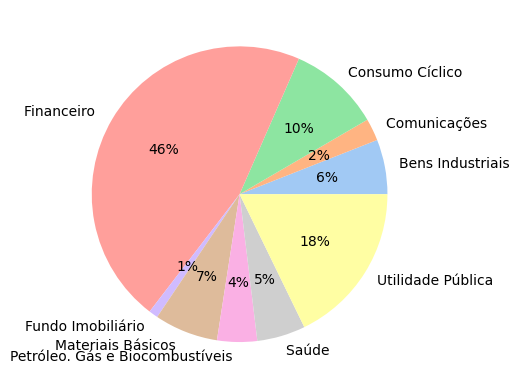

In [17]:
companies_sectors_df = pd.DataFrame(
    {"companies": sectors.keys(), "sector": sectors.values()}
)
companies_sectors_df["sector_simple"] = (
    companies_sectors_df["sector"].str.split("/").map(lambda x: x[0])
)

sector_pie = (
    df_qtd.merge(
        companies_sectors_df, left_index=True, right_on="companies", how="left"
    )
    .groupby("sector_simple")["feb"]
    .agg(sum)
    .reset_index()
)

quantities = sector_pie["feb"]
labels = sector_pie["sector_simple"]

colors = sns.color_palette("pastel")[0:13]

plt.pie(quantities, labels=labels, colors=colors, autopct="%.0f%%")
plt.show()

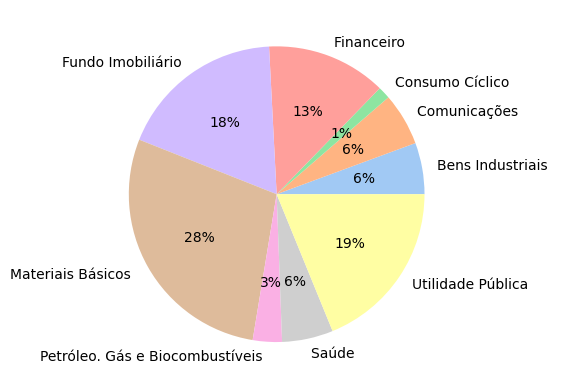

In [18]:
companies_sectors_df = pd.DataFrame(
    {"companies": sectors.keys(), "sector": sectors.values()}
)
companies_sectors_df["sector_simple"] = (
    companies_sectors_df["sector"].str.split("/").map(lambda x: x[0])
)

sector_pie = (
    df_prices.merge(
        companies_sectors_df, left_index=True, right_on="companies", how="left"
    )
    .groupby("sector_simple")["feb"]
    .agg(sum)
    .reset_index()
)

quantities = sector_pie["feb"]
labels = sector_pie["sector_simple"]

colors = sns.color_palette("pastel")[0:13]

plt.pie(quantities, labels=labels, colors=colors, autopct="%.0f%%")
plt.show()

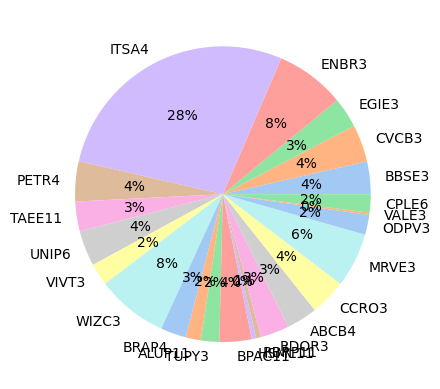

In [19]:
# pie by company
quantities = df_qtd["feb"]
labels = df_qtd.index.to_list()

colors = sns.color_palette("pastel")[0:18]

plt.pie(quantities, labels=labels, colors=colors, autopct="%.0f%%")
plt.show()

In [21]:
df_qtt_reseted


,stock,jan,feb,mar,apr,may
0,BBSE3,178,178,178,178,178
1,CVCB3,203,203,203,203,203
2,EGIE3,165,165,165,165,165
3,ENBR3,379,379,379,379,379
4,ITSA4,1390,1390,1390,1390,1390
5,PETR4,218,218,218,218,218
6,TAEE11,162,162,162,162,162
7,UNIP6,194,194,194,194,194
8,VIVT3,121,121,121,121,121
9,WIZC3,389,389,389,389,389


In [22]:
df_total_reseted


,stock,jan,feb,mar,apr,may,jun
0,BBSE3,NaN,NaN,6089.379837,6379.388977,5786.779701,5505.540054
1,CVCB3,NaN,NaN,615.089994,913.500000,631.329979,686.140023
2,EGIE3,NaN,NaN,6215.112247,6226.188240,6355.933514,6934.949799
3,ENBR3,NaN,NaN,7350.063974,7627.142954,8364.769882,8717.000000
4,ITSA4,NaN,NaN,11263.389616,11673.963337,11395.180168,12171.492920
5,PETR4,NaN,NaN,4596.192585,4747.334949,4270.234585,5344.198349
6,TAEE11,NaN,NaN,5748.651054,5994.375114,5630.638939,5981.039703
7,UNIP6,NaN,NaN,15197.084549,16356.654602,13426.104858,13267.659882
8,VIVT3,NaN,NaN,4603.445240,4943.915600,4577.841026,4816.673214
9,WIZC3,NaN,NaN,2406.374168,2539.462068,2115.019446,2267.869970


In [25]:
3300 + 3110 + 5672 + 4816

16898